Sample Mean Glucose: 116.64
Sample Max Glucose: 183
Population Mean Glucose: 120.89453125
Population Max Glucose: 199


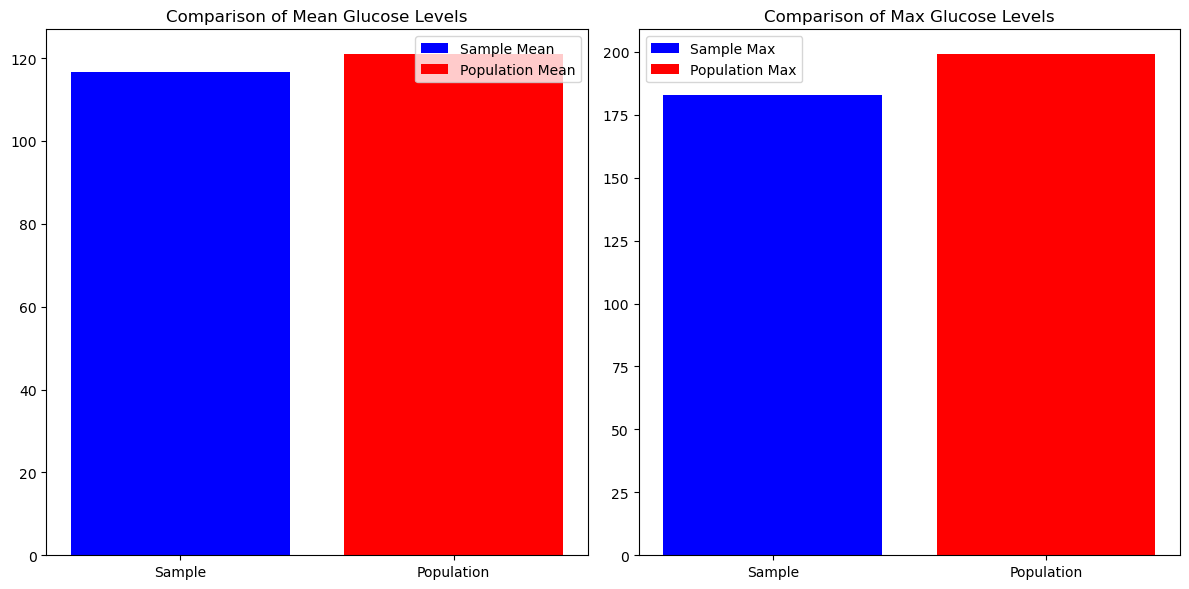

In [3]:
#Q2 a)set a seed (to ensure work reproducibility) and take a random sample of 25 observations 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
data_url = "C:/Users/harsh/Downloads/diabetes.csv"  # This URL might not work, adjust accordingly.
data = pd.read_csv(data_url)

# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample = data.sample(n=25)

# Calculate statistics for the sample
mean_glucose_sample = sample['Glucose'].mean()
max_glucose_sample = sample['Glucose'].max()

# Calculate statistics for the population
mean_glucose_population = data['Glucose'].mean()
max_glucose_population = data['Glucose'].max()

# Print sample and population statistics
print("Sample Mean Glucose:", mean_glucose_sample)
print("Sample Max Glucose:", max_glucose_sample)
print("Population Mean Glucose:", mean_glucose_population)
print("Population Max Glucose:", max_glucose_population)

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Mean Glucose Comparison
ax[0].bar('Sample', mean_glucose_sample, color='b', label='Sample Mean')
ax[0].bar('Population', mean_glucose_population, color='r', label='Population Mean')
ax[0].set_title('Comparison of Mean Glucose Levels')
ax[0].legend()

# Max Glucose Comparison
ax[1].bar('Sample', max_glucose_sample, color='b', label='Sample Max')
ax[1].bar('Population', max_glucose_population, color='r', label='Population Max')
ax[1].set_title('Comparison of Max Glucose Levels')
ax[1].legend()

plt.tight_layout()
plt.show()


98th Percentile of BMI in Sample: 40.248
98th Percentile of BMI in Population: 47.52599999999996


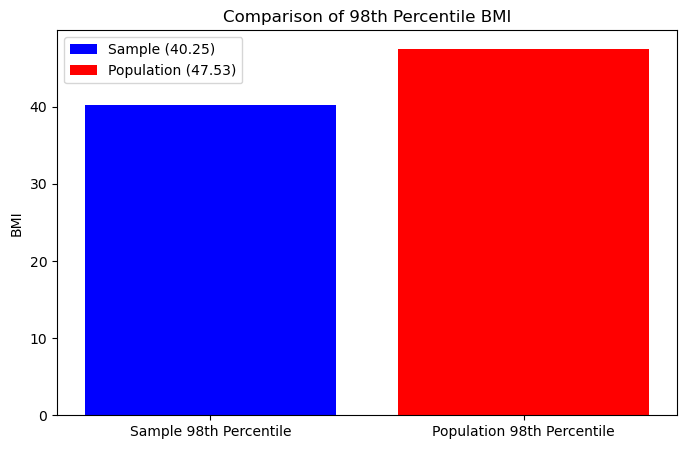

In [4]:
#Q2b)Find the 98th percentile of BMI of your sample and the population and compare the resultsusing charts
# Calculate the 98th percentile for BMI in both sample and population
percentile_98_sample = np.percentile(sample['BMI'], 98)
percentile_98_population = np.percentile(data['BMI'], 98)

# Print the results
print("98th Percentile of BMI in Sample:", percentile_98_sample)
print("98th Percentile of BMI in Population:", percentile_98_population)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.bar('Sample 98th Percentile', percentile_98_sample, color='blue', label=f'Sample ({percentile_98_sample:.2f})')
plt.bar('Population 98th Percentile', percentile_98_population, color='red', label=f'Population ({percentile_98_population:.2f})')
plt.ylabel('BMI')
plt.title('Comparison of 98th Percentile BMI')
plt.legend()
plt.show()

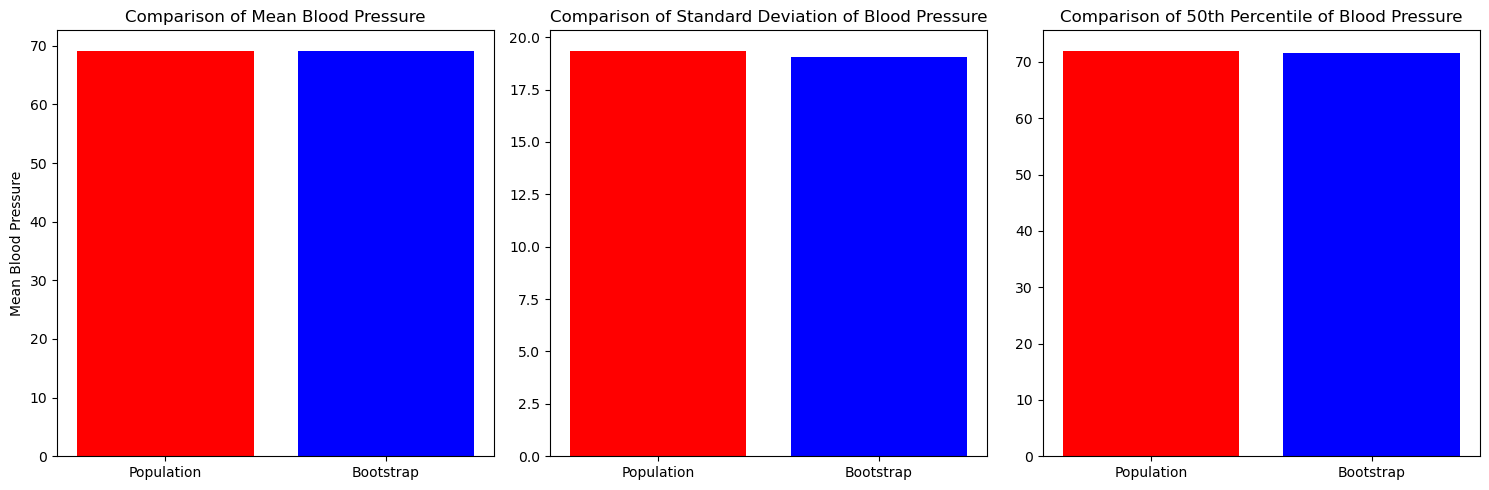

Population Mean: 69.10546875, Bootstrap Mean: 69.17692000000001
Population Std Deviation: 19.355807170644777, Bootstrap Std Deviation: 19.073717755676082
Population 50th Percentile: 72.0, Bootstrap 50th Percentile: 71.502


In [7]:
#Q2c)Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the

mean_population = data['BloodPressure'].mean()
std_population = data['BloodPressure'].std()
percentile_50_population = np.percentile(data['BloodPressure'], 50)

# Bootstrap settings
n_bootstrap_samples = 500
sample_size = 150

bootstrap_means = np.zeros(n_bootstrap_samples)
bootstrap_stds = np.zeros(n_bootstrap_samples)
bootstrap_percentiles = np.zeros(n_bootstrap_samples)

# Generate bootstrap samples
np.random.seed(42)  # for reproducibility
for i in range(n_bootstrap_samples):
    sample = data['BloodPressure'].sample(n=sample_size, replace=True)
    bootstrap_means[i] = sample.mean()
    bootstrap_stds[i] = sample.std()
    bootstrap_percentiles[i] = np.percentile(sample, 50)

# Calculate average statistics from bootstrap samples
mean_of_bootstrap_means = np.mean(bootstrap_means)
mean_of_bootstrap_stds = np.mean(bootstrap_stds)
mean_of_bootstrap_percentiles = np.mean(bootstrap_percentiles)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Mean Comparison
axes[0].bar(['Population', 'Bootstrap'], [mean_population, mean_of_bootstrap_means], color=['red', 'blue'])
axes[0].set_title('Comparison of Mean Blood Pressure')
axes[0].set_ylabel('Mean Blood Pressure')

# Standard Deviation Comparison
axes[1].bar(['Population', 'Bootstrap'], [std_population, mean_of_bootstrap_stds], color=['red', 'blue'])
axes[1].set_title('Comparison of Standard Deviation of Blood Pressure')

# Percentile Comparison
axes[2].bar(['Population', 'Bootstrap'], [percentile_50_population, mean_of_bootstrap_percentiles], color=['red', 'blue'])
axes[2].set_title('Comparison of 50th Percentile of Blood Pressure')

plt.tight_layout()
plt.show()

# Print the calculated values for clarity
print(f"Population Mean: {mean_population}, Bootstrap Mean: {mean_of_bootstrap_means}")
print(f"Population Std Deviation: {std_population}, Bootstrap Std Deviation: {mean_of_bootstrap_stds}")
print(f"Population 50th Percentile: {percentile_50_population}, Bootstrap 50th Percentile: {mean_of_bootstrap_percentiles}")